# Solution For Ratecity problem Prediction with  MLR 

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Read file in jupyter (Load datasets)
import pandas as pd
df=pd.read_csv(r'C:\Users\ssc\Desktop\Ratecity\data-scientist-test-master\data-scientist-test-master\product_raw_data_with_output.csv',na_values='UNKNOWN')

In [14]:
# look the dataset first
df.head()

,uuid,description,companycode,companyname,companyid,iscarloan,ispersonalloan,islineofcredit,isfullydrawnadvance,peer2peer,...,maximumage,chanceofapproval,equifaxscoretype,thinfile,riskassurancefee,generaterange,rangeminfee,Cost Score,Flexibilty Score,Total Score
0,0150549b-bbab-4ad9-86c9-3b88896b94d7,Flexi Personal Loan,QRCU,MOVE Bank,043b94ff-0e6c-4264-a3ed-120bcea3f41e,YES,YES,NO,YES,NaN,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,1.0,4.28,1.33
1,02990e80-2b83-4ed4-b4bc-9d3140ccb2b8,Car Loan Unsecured,SUMM,Summerland Credit Union,101cf80d-5959-468c-bc8f-e333bcbca536,YES,NO,NO,YES,NaN,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,4.0,4.59,4.06
2,09685f95-5327-4f5a-b538-b15473988240,Secured Car Loan,THRE,360 Finance,01b4f2fb-d98b-43a4-b93e-29d69b2fdc9e,YES,NO,NO,YES,NaN,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,0.0,4.27,0.43
3,0a1a285d-b088-45a9-89df-9042c643553a,Personal Loan,NaN,Catch Personal Loans,6ae79406-e479-4b43-a01c-25bc546b623a,YES,YES,NO,YES,NaN,...,NaN,NaN,Not Applicable,False,NaN,NaN,NaN,0.5,3.77,0.83
4,10bbe93a-21f5-4276-9c07-40ac1bee89ae,Secured Personal Loan,TAB,First Option Bank Ltd,31e27d97-84c7-4ef5-8316-fdc835841e76,YES,YES,NO,YES,NaN,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,0.5,3.95,0.85


In [15]:
df.shape

(173, 121)

In [16]:
df.columns

Index(['uuid', 'description', 'companycode', 'companyname', 'companyid',
       'iscarloan', 'ispersonalloan', 'islineofcredit', 'isfullydrawnadvance',
       'peer2peer',
       ...
       'maximumage', 'chanceofapproval', 'equifaxscoretype', 'thinfile',
       'riskassurancefee', 'generaterange', 'rangeminfee', 'Cost Score',
       'Flexibilty Score', 'Total Score'],
      dtype='object', length=121)

In [17]:
Data=df[['iscarloan','ispersonalloan','islineofcredit','isfullydrawnadvance','isextrarepaymentsallowed','hasredrawfacility','issecuredbyvehicle','issecuredbyproperty','issecuredbydeposit','isnewcarallowed','isusedcarallowed','ismotorcycleallowed','isboatallowed','isstudentallowed','isdebtconsolidationallowed','isrenovationallowed','issharesallowed','ismedicalbillallowed','isweddingallowed','Cost Score','Flexibilty Score','Total Score']]

In [18]:
Data.shape

(173, 22)

In [19]:
Data.head()

,iscarloan,ispersonalloan,islineofcredit,isfullydrawnadvance,isextrarepaymentsallowed,hasredrawfacility,issecuredbyvehicle,issecuredbyproperty,issecuredbydeposit,isnewcarallowed,...,isboatallowed,isstudentallowed,isdebtconsolidationallowed,isrenovationallowed,issharesallowed,ismedicalbillallowed,isweddingallowed,Cost Score,Flexibilty Score,Total Score
0,YES,YES,NO,YES,NaN,NO,NaN,NaN,NaN,YES,...,YES,YES,YES,YES,YES,YES,YES,1.0,4.28,1.33
1,YES,NO,NO,YES,YES,YES,YES,NO,NO,YES,...,NO,NO,NO,NO,NO,NO,NO,4.0,4.59,4.06
2,YES,NO,NO,YES,NaN,NaN,NaN,NaN,NaN,YES,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.27,0.43
3,YES,YES,NO,YES,NaN,NO,NaN,NaN,NaN,YES,...,YES,NaN,YES,YES,NaN,YES,YES,0.5,3.77,0.83
4,YES,YES,NO,YES,YES,YES,NaN,NaN,NaN,YES,...,YES,YES,YES,YES,YES,YES,YES,0.5,3.95,0.85


I filter out 22 columns for the classification/prediction which are important.
Next task is to handle missing value its very dificult to handle missing value because data is very less so normal mothods like imputations will not work we have to use methods like RF to handle the data.

In [20]:
# Data Summerization
Data.describe()

,Cost Score,Flexibilty Score,Total Score
count,173.000000,173.000000,173.000000
mean,2.630058,4.239538,2.791965
std,1.432236,0.584449,1.296677
min,0.000000,1.820000,0.240000
25%,1.500000,3.980000,1.750000
50%,3.000000,4.310000,3.100000
75%,4.000000,4.590000,4.010000
max,4.500000,4.960000,4.540000


In [21]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 22 columns):
iscarloan                     173 non-null object
ispersonalloan                173 non-null object
islineofcredit                159 non-null object
isfullydrawnadvance           158 non-null object
isextrarepaymentsallowed      163 non-null object
hasredrawfacility             163 non-null object
issecuredbyvehicle            151 non-null object
issecuredbyproperty           126 non-null object
issecuredbydeposit            127 non-null object
isnewcarallowed               172 non-null object
isusedcarallowed              172 non-null object
ismotorcycleallowed           159 non-null object
isboatallowed                 155 non-null object
isstudentallowed              151 non-null object
isdebtconsolidationallowed    152 non-null object
isrenovationallowed           152 non-null object
issharesallowed               145 non-null object
ismedicalbillallowed          148 non-null ob

In [22]:
# Try to Handle missing value by simple way
Data.fillna(method='ffill',inplace=True)

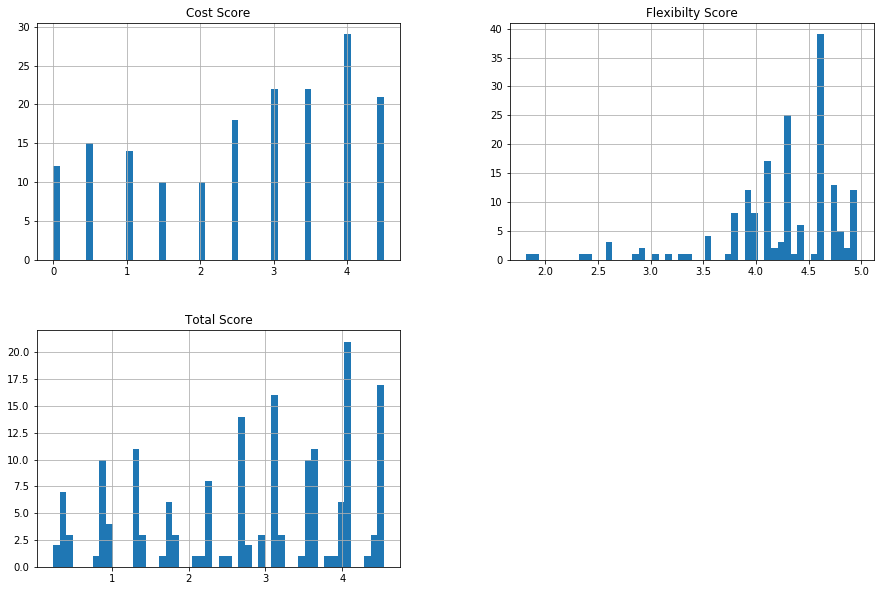

In [23]:
# data Visualization
import seaborn as sns
%matplotlib inline
Data.hist(bins=50, figsize=(15,10))
plt.show()

In [24]:
# replace yes and no with 1 and 0
Data = Data.replace({'YES': 1, 'NO': 0})

In [25]:
Data.head()

,iscarloan,ispersonalloan,islineofcredit,isfullydrawnadvance,isextrarepaymentsallowed,hasredrawfacility,issecuredbyvehicle,issecuredbyproperty,issecuredbydeposit,isnewcarallowed,...,isboatallowed,isstudentallowed,isdebtconsolidationallowed,isrenovationallowed,issharesallowed,ismedicalbillallowed,isweddingallowed,Cost Score,Flexibilty Score,Total Score
0,1,1,0,1,NaN,0,NaN,NaN,NaN,1,...,1,1,1,1,1,1,1,1.0,4.28,1.33
1,1,0,0,1,1.0,1,1.0,0.0,0.0,1,...,0,0,0,0,0,0,0,4.0,4.59,4.06
2,1,0,0,1,1.0,1,1.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0.0,4.27,0.43
3,1,1,0,1,1.0,0,1.0,0.0,0.0,1,...,1,0,1,1,0,1,1,0.5,3.77,0.83
4,1,1,0,1,1.0,1,1.0,0.0,0.0,1,...,1,1,1,1,1,1,1,0.5,3.95,0.85


In [26]:
Data.dropna(inplace=True)

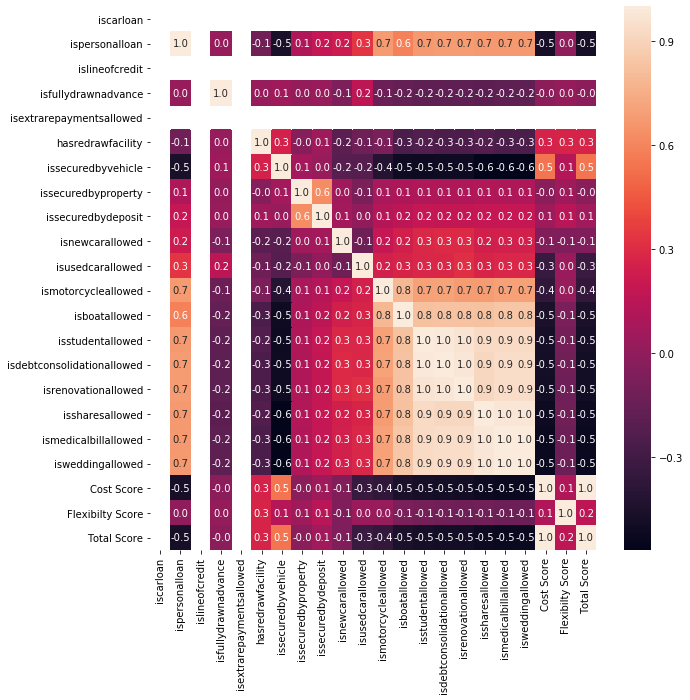

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(), annot=True, fmt='.1f')
plt.show()

In [28]:
# No Correlation so we can drop this column
Data.drop(['iscarloan', 'islineofcredit','isextrarepaymentsallowed'], axis=1, inplace=True)

In [29]:
# After dropping and implace true if we run program again it will give error. so check the shape of the Data
Data.shape

(172, 19)

In [30]:
Data.corr()

,ispersonalloan,isfullydrawnadvance,hasredrawfacility,issecuredbyvehicle,issecuredbyproperty,issecuredbydeposit,isnewcarallowed,isusedcarallowed,ismotorcycleallowed,isboatallowed,isstudentallowed,isdebtconsolidationallowed,isrenovationallowed,issharesallowed,ismedicalbillallowed,isweddingallowed,Cost Score,Flexibilty Score,Total Score
ispersonalloan,1.000000,0.022589,-0.111921,-0.463610,0.116316,0.185556,0.219198,0.336505,0.678721,0.589130,0.672826,0.684815,0.684815,0.672476,0.672826,0.672826,-0.475163,0.000714,-0.472147
isfullydrawnadvance,0.022589,1.000000,0.020768,0.051820,0.018768,0.029940,-0.071357,0.166179,-0.134863,-0.161353,-0.185556,-0.183402,-0.183402,-0.189952,-0.185556,-0.185556,-0.019460,0.018149,-0.018422
hasredrawfacility,-0.111921,0.020768,1.000000,0.255137,-0.035867,0.052131,-0.193742,-0.130923,-0.083266,-0.256391,-0.234692,-0.250636,-0.250636,-0.227416,-0.259246,-0.259246,0.259505,0.269461,0.270449
issecuredbyvehicle,-0.463610,0.051820,0.255137,1.000000,0.065537,0.026365,-0.211907,-0.214003,-0.416751,-0.510767,-0.516279,-0.508856,-0.508856,-0.557761,-0.568948,-0.568948,0.542406,0.131880,0.544903
issecuredbyproperty,0.116316,0.018768,-0.035867,0.065537,1.000000,0.626850,0.044730,-0.077507,0.084539,0.101144,0.116316,0.114966,0.114966,0.119071,0.116316,0.116316,-0.029612,0.055806,-0.026907
issecuredbydeposit,0.185556,0.029940,0.052131,0.026365,0.626850,1.000000,0.071357,0.003957,0.134863,0.161353,0.185556,0.183402,0.183402,0.189952,0.185556,0.185556,0.055842,0.145870,0.062087
isnewcarallowed,0.219198,-0.071357,-0.193742,-0.211907,0.044730,0.071357,1.000000,-0.131077,0.188897,0.243810,0.285342,0.289933,0.289933,0.243119,0.252270,0.252270,-0.057941,-0.060611,-0.060377
isusedcarallowed,0.336505,0.166179,-0.130923,-0.214003,-0.077507,0.003957,-0.131077,1.000000,0.247456,0.265206,0.279199,0.284984,0.313615,0.267715,0.279199,0.279199,-0.330311,0.037044,-0.326501
ismotorcycleallowed,0.678721,-0.134863,-0.083266,-0.416751,0.084539,0.134863,0.188897,0.247456,1.000000,0.787741,0.702761,0.711315,0.687292,0.685897,0.702761,0.702761,-0.360787,0.021023,-0.357632
isboatallowed,0.589130,-0.161353,-0.256391,-0.510767,0.101144,0.161353,0.243810,0.265206,0.787741,1.000000,0.822826,0.833073,0.833073,0.826029,0.846196,0.846196,-0.456164,-0.080292,-0.456948


In [54]:
# Model Building
X = Data.iloc[:,0:19]
y = Data.iloc[:,-1]

In [34]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=7)

In [35]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Linear regressiong
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [37]:
r2_score(y_test, predictions)

1.0

In [46]:
# Backwards elimination
import statsmodels.regression.linear_model as sm
X_opt = X.iloc[:,[0,1,2,3,4,5]]
#OrdinaryLeastSquares
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Total Score   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              201.8
Date:                Fri, 24 Jan 2020   Prob (F-statistic):                    1.53e-73
Time:                        13:24:43   Log-Likelihood:                         -255.83
No. Observations:                 172   AIC:                                      523.7
Df Residuals:                     166   BIC:                                      542.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
ispersonalloan         -0.5470      0.186     -2.935      0.004      -0.915      -0.179
isfullydrawnadvance     1.7094      0.229      7.465      0.000       1.257       2.161
hasredrawfacility       0.4699      0.180      2.607      0.010       0.114       0.826
issecuredbyvehicle      1.3770      0.212      6.485      0.000       0.958       1.796
issecuredbyproperty    -1.5307      1.003     -1.525      0.129      -3.512       0.450
issecuredbydeposit      1.2363      0.646      1.915      0.057      -0.038       2.511
==============================================================================
Omnibus:                        5.160   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                4.931
Skew:                          -0.412   Prob(JB):                       0.0850
Kurtosis:                       3.087   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

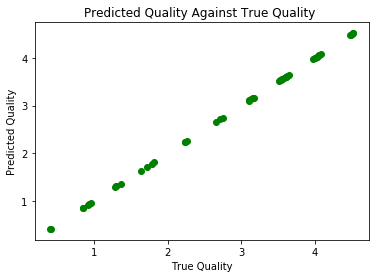

In [44]:
# Displaying the results
import matplotlib.pylab as plt
plt.scatter(y_test, predictions, c='g')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()

In [51]:
# We get 87% accuracy for the problem which is very good at this stage

In [56]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Solution For Ratecity problem Classification with  Best Model Algprithms   

In [57]:
# Read file in jupyter (Load datasets)
import pandas as pd
df=pd.read_csv(r'C:\Users\ssc\Desktop\Ratecity\data-scientist-test-master\data-scientist-test-master\product_raw_data_with_output.csv',na_values='UNKNOWN')

In [58]:
# look the dataset first
df.head()

,uuid,description,companycode,companyname,companyid,iscarloan,ispersonalloan,islineofcredit,isfullydrawnadvance,peer2peer,...,maximumage,chanceofapproval,equifaxscoretype,thinfile,riskassurancefee,generaterange,rangeminfee,Cost Score,Flexibilty Score,Total Score
0,0150549b-bbab-4ad9-86c9-3b88896b94d7,Flexi Personal Loan,QRCU,MOVE Bank,043b94ff-0e6c-4264-a3ed-120bcea3f41e,YES,YES,NO,YES,NaN,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,1.0,4.28,1.33
1,02990e80-2b83-4ed4-b4bc-9d3140ccb2b8,Car Loan Unsecured,SUMM,Summerland Credit Union,101cf80d-5959-468c-bc8f-e333bcbca536,YES,NO,NO,YES,NaN,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,4.0,4.59,4.06
2,09685f95-5327-4f5a-b538-b15473988240,Secured Car Loan,THRE,360 Finance,01b4f2fb-d98b-43a4-b93e-29d69b2fdc9e,YES,NO,NO,YES,NaN,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,0.0,4.27,0.43
3,0a1a285d-b088-45a9-89df-9042c643553a,Personal Loan,NaN,Catch Personal Loans,6ae79406-e479-4b43-a01c-25bc546b623a,YES,YES,NO,YES,NaN,...,NaN,NaN,Not Applicable,False,NaN,NaN,NaN,0.5,3.77,0.83
4,10bbe93a-21f5-4276-9c07-40ac1bee89ae,Secured Personal Loan,TAB,First Option Bank Ltd,31e27d97-84c7-4ef5-8316-fdc835841e76,YES,YES,NO,YES,NaN,...,NaN,NaN,Not Applicable,NaN,NaN,NaN,NaN,0.5,3.95,0.85


In [59]:
df.shape

(173, 121)

In [60]:
df.columns

Index(['uuid', 'description', 'companycode', 'companyname', 'companyid',
       'iscarloan', 'ispersonalloan', 'islineofcredit', 'isfullydrawnadvance',
       'peer2peer',
       ...
       'maximumage', 'chanceofapproval', 'equifaxscoretype', 'thinfile',
       'riskassurancefee', 'generaterange', 'rangeminfee', 'Cost Score',
       'Flexibilty Score', 'Total Score'],
      dtype='object', length=121)

In [61]:
Data=df[['iscarloan','ispersonalloan','islineofcredit','isfullydrawnadvance','isextrarepaymentsallowed','hasredrawfacility','issecuredbyvehicle','issecuredbyproperty','issecuredbydeposit','isnewcarallowed','isusedcarallowed','ismotorcycleallowed','isboatallowed','isstudentallowed','isdebtconsolidationallowed','isrenovationallowed','issharesallowed','ismedicalbillallowed','isweddingallowed','Cost Score','Flexibilty Score','Total Score']]

In [62]:
Data.shape

(173, 22)

In [63]:
Data.head()

,iscarloan,ispersonalloan,islineofcredit,isfullydrawnadvance,isextrarepaymentsallowed,hasredrawfacility,issecuredbyvehicle,issecuredbyproperty,issecuredbydeposit,isnewcarallowed,...,isboatallowed,isstudentallowed,isdebtconsolidationallowed,isrenovationallowed,issharesallowed,ismedicalbillallowed,isweddingallowed,Cost Score,Flexibilty Score,Total Score
0,YES,YES,NO,YES,NaN,NO,NaN,NaN,NaN,YES,...,YES,YES,YES,YES,YES,YES,YES,1.0,4.28,1.33
1,YES,NO,NO,YES,YES,YES,YES,NO,NO,YES,...,NO,NO,NO,NO,NO,NO,NO,4.0,4.59,4.06
2,YES,NO,NO,YES,NaN,NaN,NaN,NaN,NaN,YES,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.27,0.43
3,YES,YES,NO,YES,NaN,NO,NaN,NaN,NaN,YES,...,YES,NaN,YES,YES,NaN,YES,YES,0.5,3.77,0.83
4,YES,YES,NO,YES,YES,YES,NaN,NaN,NaN,YES,...,YES,YES,YES,YES,YES,YES,YES,0.5,3.95,0.85


I filter out 22 columns for the classification/prediction which are important.
Next task is to handle missing value its very dificult to handle missing value because data is very less so normal mothods like imputations will not work we have to use methods like RF to handle the data.

In [65]:
# Data Summerization
Data.describe()

,Cost Score,Flexibilty Score,Total Score
count,173.000000,173.000000,173.000000
mean,2.630058,4.239538,2.791965
std,1.432236,0.584449,1.296677
min,0.000000,1.820000,0.240000
25%,1.500000,3.980000,1.750000
50%,3.000000,4.310000,3.100000
75%,4.000000,4.590000,4.010000
max,4.500000,4.960000,4.540000


In [66]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 22 columns):
iscarloan                     173 non-null object
ispersonalloan                173 non-null object
islineofcredit                159 non-null object
isfullydrawnadvance           158 non-null object
isextrarepaymentsallowed      163 non-null object
hasredrawfacility             163 non-null object
issecuredbyvehicle            151 non-null object
issecuredbyproperty           126 non-null object
issecuredbydeposit            127 non-null object
isnewcarallowed               172 non-null object
isusedcarallowed              172 non-null object
ismotorcycleallowed           159 non-null object
isboatallowed                 155 non-null object
isstudentallowed              151 non-null object
isdebtconsolidationallowed    152 non-null object
isrenovationallowed           152 non-null object
issharesallowed               145 non-null object
ismedicalbillallowed          148 non-null ob

In [67]:
Data.dtypes

iscarloan                      object
ispersonalloan                 object
islineofcredit                 object
isfullydrawnadvance            object
isextrarepaymentsallowed       object
hasredrawfacility              object
issecuredbyvehicle             object
issecuredbyproperty            object
issecuredbydeposit             object
isnewcarallowed                object
isusedcarallowed               object
ismotorcycleallowed            object
isboatallowed                  object
isstudentallowed               object
isdebtconsolidationallowed     object
isrenovationallowed            object
issharesallowed                object
ismedicalbillallowed           object
isweddingallowed               object
Cost Score                    float64
Flexibilty Score              float64
Total Score                   float64
dtype: object

In [68]:
# Try to Handle missing value by simple way
Data.fillna(method='ffill',inplace=True)

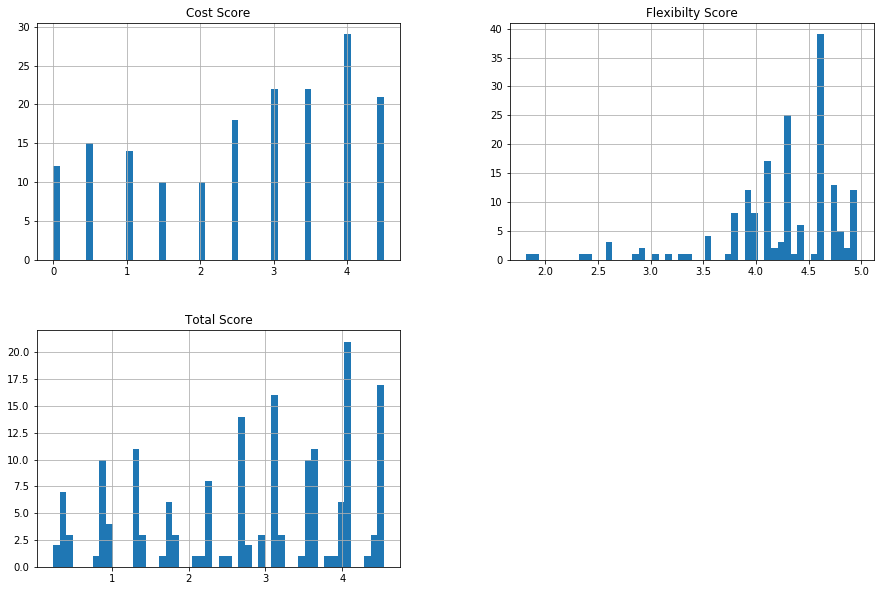

In [69]:
# data Visualization
import seaborn as sns
%matplotlib inline
Data.hist(bins=50, figsize=(15,10))
plt.show()

In [70]:
# replace yes and no with 1 and 0
Data = Data.replace({'YES': 1, 'NO': 0})

In [71]:
Data.head()

,iscarloan,ispersonalloan,islineofcredit,isfullydrawnadvance,isextrarepaymentsallowed,hasredrawfacility,issecuredbyvehicle,issecuredbyproperty,issecuredbydeposit,isnewcarallowed,...,isboatallowed,isstudentallowed,isdebtconsolidationallowed,isrenovationallowed,issharesallowed,ismedicalbillallowed,isweddingallowed,Cost Score,Flexibilty Score,Total Score
0,1,1,0,1,NaN,0,NaN,NaN,NaN,1,...,1,1,1,1,1,1,1,1.0,4.28,1.33
1,1,0,0,1,1.0,1,1.0,0.0,0.0,1,...,0,0,0,0,0,0,0,4.0,4.59,4.06
2,1,0,0,1,1.0,1,1.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0.0,4.27,0.43
3,1,1,0,1,1.0,0,1.0,0.0,0.0,1,...,1,0,1,1,0,1,1,0.5,3.77,0.83
4,1,1,0,1,1.0,1,1.0,0.0,0.0,1,...,1,1,1,1,1,1,1,0.5,3.95,0.85


In [72]:
Data.dropna(inplace=True)

In [73]:
Data.shape

(172, 22)

In [74]:
Data.columns

Index(['iscarloan', 'ispersonalloan', 'islineofcredit', 'isfullydrawnadvance',
       'isextrarepaymentsallowed', 'hasredrawfacility', 'issecuredbyvehicle',
       'issecuredbyproperty', 'issecuredbydeposit', 'isnewcarallowed',
       'isusedcarallowed', 'ismotorcycleallowed', 'isboatallowed',
       'isstudentallowed', 'isdebtconsolidationallowed', 'isrenovationallowed',
       'issharesallowed', 'ismedicalbillallowed', 'isweddingallowed',
       'Cost Score', 'Flexibilty Score', 'Total Score'],
      dtype='object')

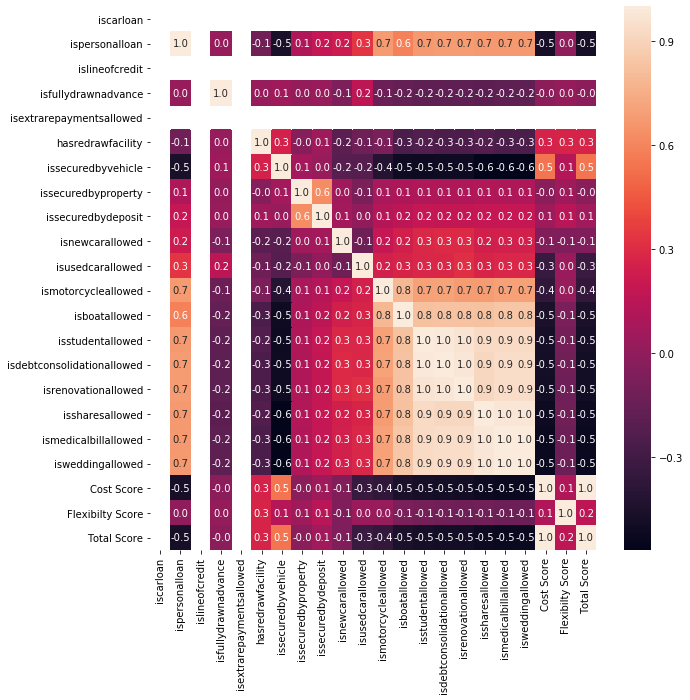

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(), annot=True, fmt='.1f')
plt.show()

In [76]:
# No Correlation so we can drop this column
Data.drop(['iscarloan', 'islineofcredit','isextrarepaymentsallowed'], axis=1, inplace=True)

In [77]:
# After dropping and implace true if we run program again it will give error. so check the shape of the Data
Data.shape

(172, 19)

In [78]:
Data.corr()

,ispersonalloan,isfullydrawnadvance,hasredrawfacility,issecuredbyvehicle,issecuredbyproperty,issecuredbydeposit,isnewcarallowed,isusedcarallowed,ismotorcycleallowed,isboatallowed,isstudentallowed,isdebtconsolidationallowed,isrenovationallowed,issharesallowed,ismedicalbillallowed,isweddingallowed,Cost Score,Flexibilty Score,Total Score
ispersonalloan,1.000000,0.022589,-0.111921,-0.463610,0.116316,0.185556,0.219198,0.336505,0.678721,0.589130,0.672826,0.684815,0.684815,0.672476,0.672826,0.672826,-0.475163,0.000714,-0.472147
isfullydrawnadvance,0.022589,1.000000,0.020768,0.051820,0.018768,0.029940,-0.071357,0.166179,-0.134863,-0.161353,-0.185556,-0.183402,-0.183402,-0.189952,-0.185556,-0.185556,-0.019460,0.018149,-0.018422
hasredrawfacility,-0.111921,0.020768,1.000000,0.255137,-0.035867,0.052131,-0.193742,-0.130923,-0.083266,-0.256391,-0.234692,-0.250636,-0.250636,-0.227416,-0.259246,-0.259246,0.259505,0.269461,0.270449
issecuredbyvehicle,-0.463610,0.051820,0.255137,1.000000,0.065537,0.026365,-0.211907,-0.214003,-0.416751,-0.510767,-0.516279,-0.508856,-0.508856,-0.557761,-0.568948,-0.568948,0.542406,0.131880,0.544903
issecuredbyproperty,0.116316,0.018768,-0.035867,0.065537,1.000000,0.626850,0.044730,-0.077507,0.084539,0.101144,0.116316,0.114966,0.114966,0.119071,0.116316,0.116316,-0.029612,0.055806,-0.026907
issecuredbydeposit,0.185556,0.029940,0.052131,0.026365,0.626850,1.000000,0.071357,0.003957,0.134863,0.161353,0.185556,0.183402,0.183402,0.189952,0.185556,0.185556,0.055842,0.145870,0.062087
isnewcarallowed,0.219198,-0.071357,-0.193742,-0.211907,0.044730,0.071357,1.000000,-0.131077,0.188897,0.243810,0.285342,0.289933,0.289933,0.243119,0.252270,0.252270,-0.057941,-0.060611,-0.060377
isusedcarallowed,0.336505,0.166179,-0.130923,-0.214003,-0.077507,0.003957,-0.131077,1.000000,0.247456,0.265206,0.279199,0.284984,0.313615,0.267715,0.279199,0.279199,-0.330311,0.037044,-0.326501
ismotorcycleallowed,0.678721,-0.134863,-0.083266,-0.416751,0.084539,0.134863,0.188897,0.247456,1.000000,0.787741,0.702761,0.711315,0.687292,0.685897,0.702761,0.702761,-0.360787,0.021023,-0.357632
isboatallowed,0.589130,-0.161353,-0.256391,-0.510767,0.101144,0.161353,0.243810,0.265206,0.787741,1.000000,0.822826,0.833073,0.833073,0.826029,0.846196,0.846196,-0.456164,-0.080292,-0.456948


In [79]:
Data.dtypes

ispersonalloan                  int64
isfullydrawnadvance             int64
hasredrawfacility               int64
issecuredbyvehicle            float64
issecuredbyproperty           float64
issecuredbydeposit            float64
isnewcarallowed                 int64
isusedcarallowed                int64
ismotorcycleallowed             int64
isboatallowed                   int64
isstudentallowed                int64
isdebtconsolidationallowed      int64
isrenovationallowed             int64
issharesallowed                 int64
ismedicalbillallowed            int64
isweddingallowed                int64
Cost Score                    float64
Flexibilty Score              float64
Total Score                   float64
dtype: object

In [88]:
# Y must not be continuous so convert it into int format  
Data['Total Score']= Data['Total Score'].astype(int)

In [89]:
# Model Building
x = Data.iloc[:,0:19]
y = Data.iloc[:,-1]

In [82]:
# Do some label encoding for y values to run the different models
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 0)

In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('Test Accuracy {:.2f}%'.format(lr.score(x_test, y_test)*100))

Test Accuracy 74.29%


In [94]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
print("KNN accuracy: {:.2f}%".format(knn.score(x_test, y_test)*100))

KNN accuracy: 91.43%


In [95]:
# Random forset

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state= 1)
rf.fit(x_train, y_train)
print("Random Forest accuracy: {:.2f}%".format(rf.score(x_test, y_test)*100))

Random Forest accuracy: 100.00%


# Random Forest Gives 100% Accuracy it tells that if we provide the input it will defenately classify the the Good Product ranking